In [ ]:
import numpy
import pandas
import random
import tensorflow
import matplotlib.pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.datasets import fashion_mnist

In this initial step we'll begin by following these few steps to make data ready to be fed into the ml algorithm.
- Import data 
- inspect their shapes
- visualize them

In [ ]:
# Define labels
dataLabels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [ ]:
# Import data 
(xdata,xlabel),(ydata,ylabel) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Shape
xdata.shape,xlabel.shape

((60000, 28, 28), (60000,))

In [ ]:
# Dimension
xdata.ndim,xlabel.ndim

(3, 1)

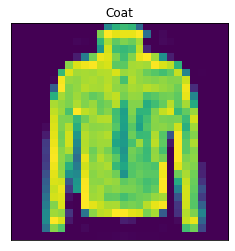

In [ ]:
# Visualizing the data
idx = random.choice(range(len(xdata)))
matplotlib.pyplot.imshow(xdata[idx])
matplotlib.pyplot.title(dataLabels[xlabel[idx]])
matplotlib.pyplot.xticks([])
matplotlib.pyplot.yticks([])
matplotlib.pyplot.show()

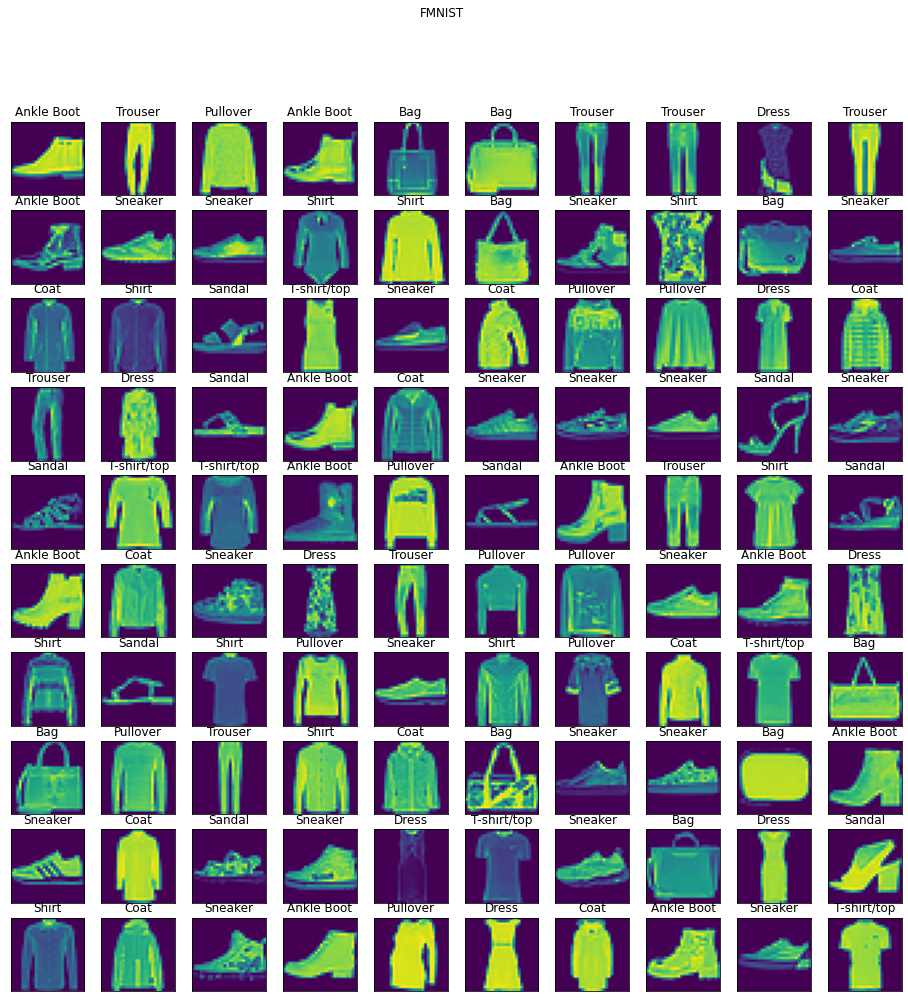

In [ ]:
# Visualizing multiple images
fig,ax = matplotlib.pyplot.subplots(nrows=10,ncols=10,figsize=(16,16))
for i in range(10):
  for j in range(10):
    idx = random.choice(range(len(xdata)))
    ax[i,j].set_title(dataLabels[xlabel[idx]])
    ax[i,j].set_xticks([])
    ax[i,j].set_yticks([])
    ax[i,j].imshow(xdata[idx])

fig.suptitle('FMNIST')
fig.show()


Now it's time to outline the structure of the model we are going to use.
- Create the model
- Add definte number of layers
- Compile the function with
  - loss function
  - optimizer
  - metrics
- Fit the model

In [ ]:
# Creating the model
model = tensorflow.keras.Sequential()
# Adding layers
model.add(tensorflow.keras.layers.Flatten(input_shape=(28,28)))
model.add(tensorflow.keras.layers.Dense(4,activation='relu'))
model.add(tensorflow.keras.layers.Dense(4,activation='relu'))
model.add(tensorflow.keras.layers.Dense(10,activation='softmax'))
# Compiling the model
model.compile(loss=tensorflow.keras.losses.CategoricalCrossentropy(),
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# Fit the model
history = model.fit(xdata,tensorflow.one_hot(xlabel,depth=10),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3973 - accuracy: 0.0994
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3040 - accuracy: 0.1007
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3038 - accuracy: 0.0999
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3039 - accuracy: 0.0989
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3041 - accuracy: 0.1003
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3036 - accuracy: 0.1024
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3041 - accuracy: 0.0983
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3040 - accuracy: 0.1004
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3039 - accuracy: 0.1009
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.303

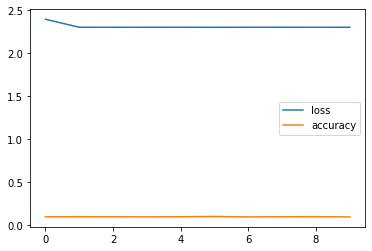

In [ ]:
# Visualizing how the model has performed
pandas.DataFrame(history.history).plot()
## Since the model has not performed as we have expected, let's alter the parameters and see 

In [ ]:
numpy.sqrt(768)

27.712812921102035

In [ ]:
# Creating the model
model_1 = tensorflow.keras.Sequential()
# Adding layers
model_1.add(tensorflow.keras.layers.Flatten(input_shape=(28,28)))
model_1.add(tensorflow.keras.layers.Dense(28,activation='relu'))
model_1.add(tensorflow.keras.layers.Dense(28,activation='relu'))
model_1.add(tensorflow.keras.layers.Dense(10,activation='softmax'))
# Compiling the model
model_1.compile(loss=tensorflow.keras.losses.CategoricalCrossentropy(),
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(xdata,tensorflow.one_hot(xlabel,depth=10),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.5174 - accuracy: 0.2210
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6703 - accuracy: 0.2980
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4761 - accuracy: 0.3646
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6058 - accuracy: 0.3095
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7175 - accuracy: 0.1937
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.2208 - accuracy: 0.1956
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7147 - accuracy: 0.1965
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6920 - accuracy: 0.1997
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6960 - accuracy: 0.1983
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.803

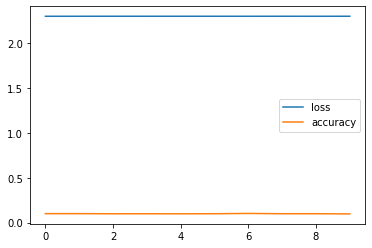

In [ ]:
# Visualizing how the model has performed
pandas.DataFrame(history_1.history).plot()
## The model shows no drastic improvement compared to the older one even though the number of hidden layers were increase

In [ ]:
## Therefore we will normalize the date before next fitting
# find the min and max values of xdata to normalize them 
xdata.min(),xdata.max()

(0, 255)

In [ ]:
# Normalizing the values
nmlxdata = xdata/255
nmlydata = ydata/255

In [ ]:
model_2 = tensorflow.keras.Sequential()

model_2.add(tensorflow.keras.layers.Flatten(input_shape=(28,28)))
model_2.add(tensorflow.keras.layers.Dense(28,activation='relu'))
model_2.add(tensorflow.keras.layers.Dense(28,activation='relu'))
model_2.add(tensorflow.keras.layers.Dense(10,activation='softmax'))

model_2.compile(
    loss= tensorflow.keras.losses.CategoricalCrossentropy(),
    optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

history_2 = model_2.fit(nmlxdata,tensorflow.one_hot(xlabel,depth=10),epochs=10,validation_data=(nmlydata,tensorflow.one_hot(ylabel,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5557 - accuracy: 0.7997 - val_loss: 0.5357 - val_accuracy: 0.8058
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4568 - accuracy: 0.8363 - val_loss: 0.4583 - val_accuracy: 0.8402
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4405 - accuracy: 0.8423 - val_loss: 0.5304 - val_accuracy: 0.8114
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4282 - accuracy: 0.8483 - val_loss: 0.4676 - val_accuracy: 0.8333
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4187 - accuracy: 0.8494 - val_loss: 0.5371 - val_accuracy: 0.8174
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4107 - accuracy: 0.8535 - val_loss: 0.5079 - val_accuracy: 0.8358
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4046 - accuracy: 0.8553 - val_loss: 0.4416 - val_accuracy:

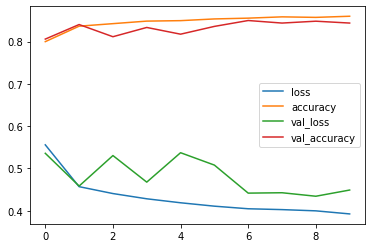

In [ ]:
pandas.DataFrame(history_2.history).plot()
# we can see that the accuracy and validation accuracy has shot up even since normalization...

In [ ]:
# I honestly can't bear this, isn't working at all....
# why not reduce hidden layers back to four, let's try
# i found a terrible hole in the code, now it's fine
## i can conclude that normalization has imporved the results drastically
# reducing the hidden layers have caused the accuracy to drop sharply
model_3 = tensorflow.keras.Sequential()

model_3.add(tensorflow.keras.layers.Flatten(input_shape=(28,28)))
model_3.add(tensorflow.keras.layers.Dense(4,activation='relu'))
model_3.add(tensorflow.keras.layers.Dense(4,activation='relu'))
model_3.add(tensorflow.keras.layers.Dense(10,activation='softmax'))

model_3.compile(
    loss= tensorflow.keras.losses.CategoricalCrossentropy(),
    optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

history_3 = model_3.fit(nmlxdata,tensorflow.one_hot(xlabel,depth=10),epochs=10,validation_data=(nmlydata,tensorflow.one_hot(ylabel,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5370 - accuracy: 0.3273 - val_loss: 1.4222 - val_accuracy: 0.3770
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4086 - accuracy: 0.3799 - val_loss: 1.3788 - val_accuracy: 0.3997
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3857 - accuracy: 0.3952 - val_loss: 1.3713 - val_accuracy: 0.3997
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.3697 - accuracy: 0.4075 - val_loss: 1.3542 - val_accuracy: 0.4308
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3550 - accuracy: 0.4302 - val_loss: 1.3445 - val_accuracy: 0.4554
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2379 - accuracy: 0.4775 - val_loss: 1.2083 - val_accuracy: 0.4807
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1718 - accuracy: 0.4937 - val_loss: 1.1456 - val_accuracy:

In [ ]:
# since we have reach a point where the model is performing some what okey, let's plot confusion matrix
yprobs = model_2.predict(nmlydata)
# with the prediction in hand let's find outline the confusion matrix
# i came across this error 'ValueError: Classification metrics can't handle a mix of multiclass and unknown targets'
# have to make sure that both of them look alike
# again a different problem "ValueError: Expected array-like (array or non-string sequence), got TensorShape([10000, 10])"
yprobs.shape,tensorflow.one_hot(ylabel,depth=10).shape

313/313 [==============================] - 0s 1ms/step


((10000, 10), TensorShape([10000, 10]))

In [ ]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

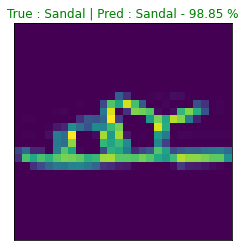

In [ ]:
idx = random.choice(range(len(ydata)))
if ypred[idx]== ylabel[idx]:
  color = 'green'
else:
  color = 'red'
matplotlib.pyplot.imshow(ydata[idx])
matplotlib.pyplot.title(f'True : {dataLabels[ylabel[idx]]} | Pred : {dataLabels[ypred[idx]]} - {yprobs[idx].max()*100:.2f} %', color=color)
matplotlib.pyplot.xticks([])
matplotlib.pyplot.yticks([])

matplotlib.pyplot.show()

In [ ]:
# it says multi label indicator is not supported
# i somehow will have to convert ypred into something like ylabels i guess
ypred = yprobs.argmax(axis=1)numpy.argmax(yprobs,axis=1)
cnfmt = confusion_matrix(ylabel,ypred)
# looks sick let's visualize it shall we

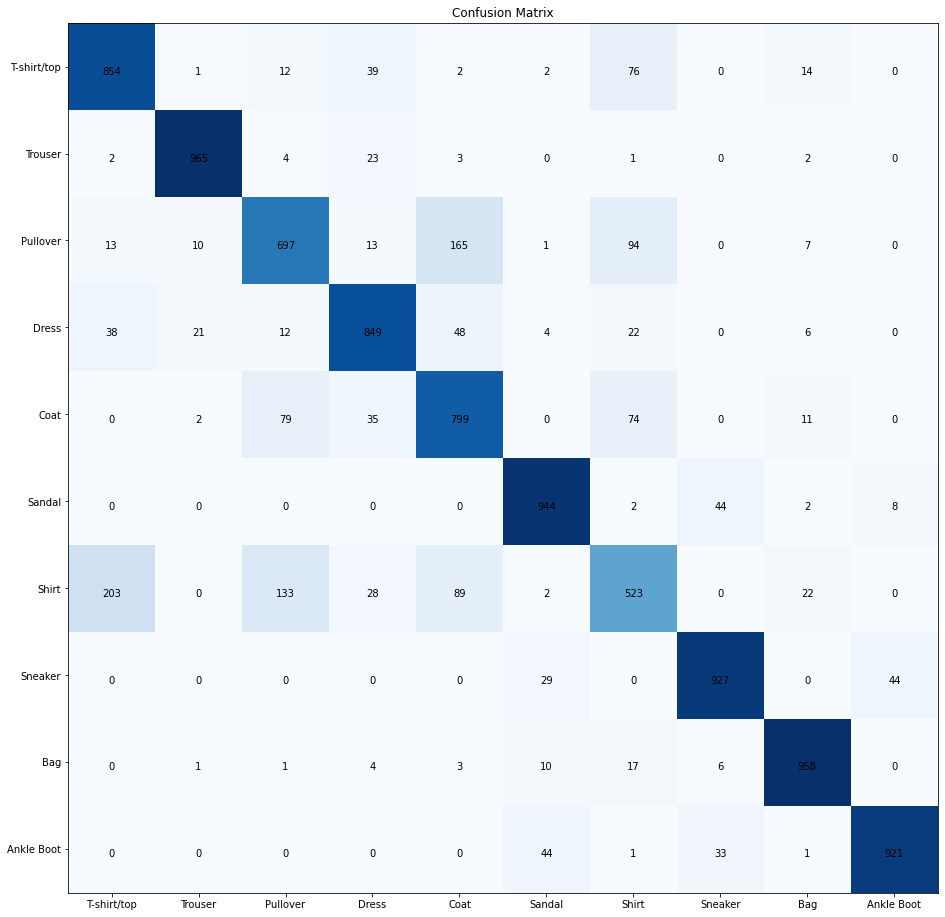

In [ ]:
# plot_confusion_matrix can't be used since it requires sci-kit learn estimator, this is wholly my opinion
# let's plot
matplotlib.pyplot.figure(figsize=(16,16))
matplotlib.pyplot.imshow(cnfmt,cmap='Blues')

for i in range(10):
  for j in range(10):
    matplotlib.pyplot.text(j,i,cnfmt[i,j],ha='center',va='top')
    matplotlib.pyplot.xticks(range(len(dataLabels)),dataLabels)
    matplotlib.pyplot.yticks(range(len(dataLabels)),dataLabels)

matplotlib.pyplot.title('Confusion Matrix')
matplotlib.pyplot.show()


In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 28)                21980     
                                                                 
 dense_1 (Dense)             (None, 28)                812       
                                                                 
 dense_2 (Dense)             (None, 10)                290       
                                                                 
Total params: 23,082
Trainable params: 23,082
Non-trainable params: 0
_________________________________________________________________
